In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [27]:
# Load dataset
df = pd.read_csv('/content/data_full.csv', index_col=0)

# Display the first few rows
print(df.head())


     surf_x     surf_y     surf_vx   surf_vy   surf_elv  surf_dhdt  surf_SMB  \
0 -206075.0 -1827425.0 -102.347084  2.470532  1873.4190  -0.197525  0.300457   
1 -205925.0 -1827575.0 -101.747060  3.145359  1875.0760  -0.197893  0.300307   
2 -205925.0 -1827575.0 -101.747060  3.145359  1875.0760  -0.197893  0.300307   
3 -205925.0 -1827725.0 -101.540184  2.158114  1874.1207  -0.197630  0.300113   
4 -205775.0 -1827875.0 -101.145680  1.128310  1875.8519  -0.198079  0.299954   

     track_bed_x  track_bed_y  track_bed_target  
0 -206037.406250 -1827384.000        538.235168  
1 -205981.171875 -1827518.625        550.491638  
2 -205953.109375 -1827586.125        563.800598  
3 -205897.078125 -1827720.750        560.530823  
4 -205841.328125 -1827855.625        545.708252  


In [28]:
# Drop rows with missing values
df.dropna(inplace=True)

# Create a new feature: velocity magnitude
df['velocity_magnitude'] = np.sqrt(df['surf_vx']**2 + df['surf_vy']**2)

# Define feature columns and target
features = [
    'surf_x', 'surf_y', 'surf_vx', 'surf_vy', 'surf_elv',
    'surf_dhdt', 'surf_SMB', 'velocity_magnitude'
]
target = 'track_bed_target'

X = df[features]
y = df[target]


In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [31]:
model = XGBRegressor(
    max_depth=7,
    n_estimators=350,
    learning_rate=0.25,
    subsample=0.8,
    min_child_weight=0.25,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.25, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=0.25, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=350, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [32]:
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")


RMSE: 26.678
MAE: 17.598
R²: 0.978


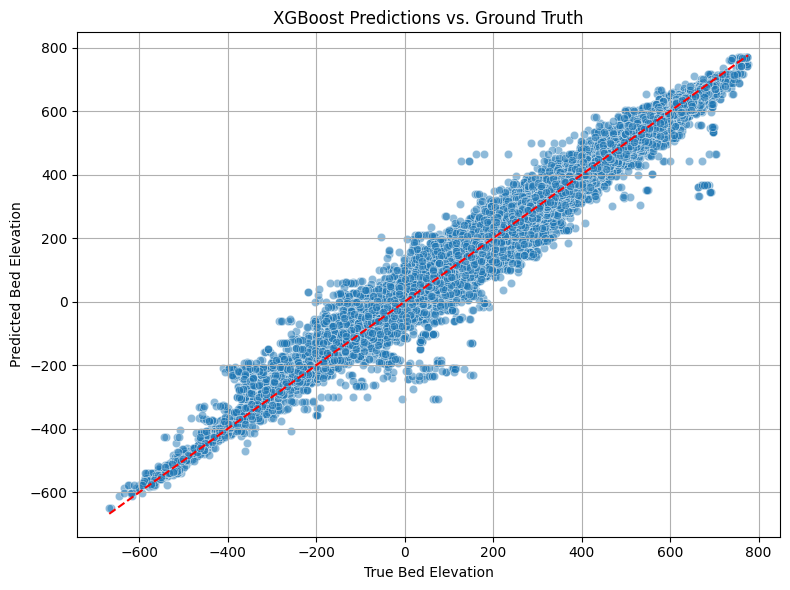

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of predictions vs true values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("True Bed Elevation")
plt.ylabel("Predicted Bed Elevation")
plt.title("XGBoost Predictions vs. Ground Truth")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.tight_layout()
plt.show()


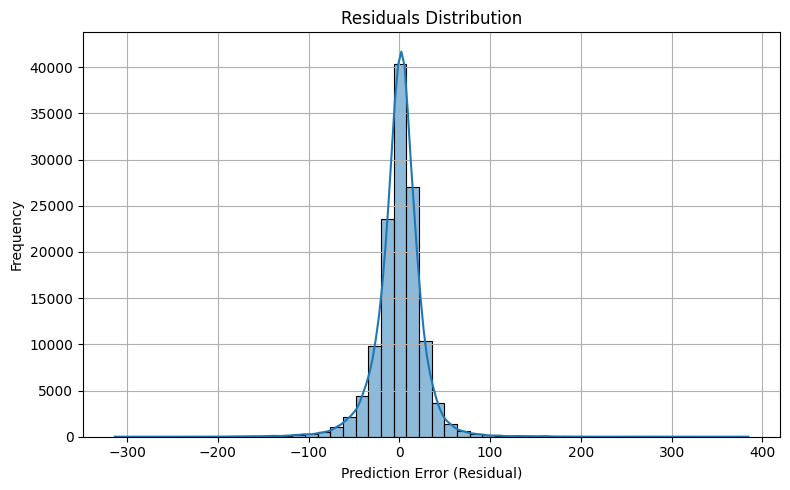

In [34]:
residuals_raw = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals_raw, bins=50, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error (Residual)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


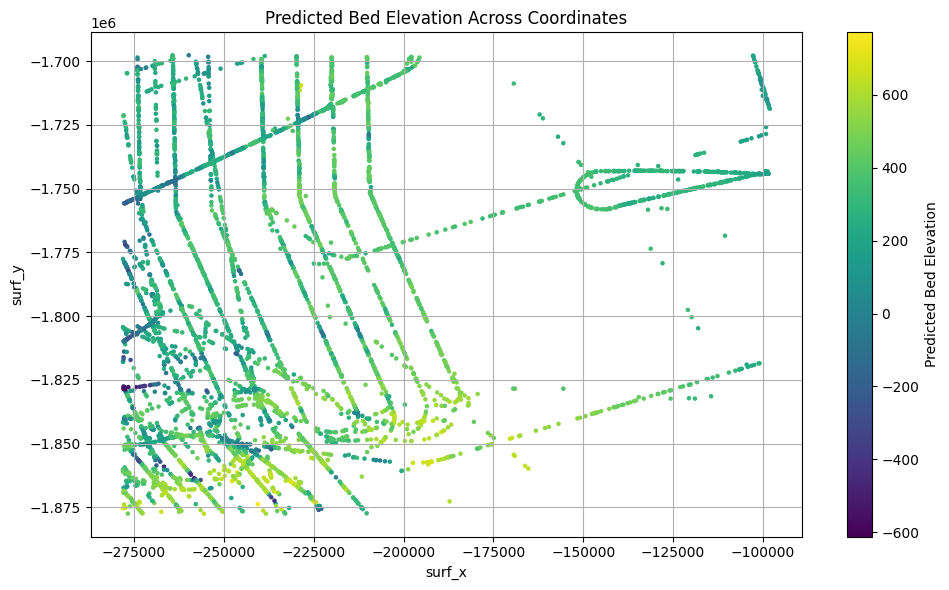

In [35]:
# Take a subsample for visual clarity
sample_df = df.sample(5000, random_state=42).copy()
X_sample = sample_df[features]
X_sample_scaled = scaler.transform(X_sample)
sample_df["prediction"] = model.predict(X_sample_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    sample_df['surf_x'], sample_df['surf_y'],
    c=sample_df['prediction'], cmap='viridis', s=5
)
plt.colorbar(scatter, label="Predicted Bed Elevation")
plt.title("Predicted Bed Elevation Across Coordinates")
plt.xlabel("surf_x")
plt.ylabel("surf_y")
plt.grid(True)
plt.tight_layout()
plt.show()


In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv('/content/data_full.csv', index_col=0)
df.dropna(inplace=True)

# Define features (without derived feature)
features_raw = [
    'surf_x', 'surf_y', 'surf_vx', 'surf_vy',
    'surf_elv', 'surf_dhdt', 'surf_SMB'
]
target = 'track_bed_target'

X_raw = df[features_raw]
y = df[target]

# Scale the features
scaler_raw = StandardScaler()
X_raw_scaled = scaler_raw.fit_transform(X_raw)

# Train/test split
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_raw_scaled, y, test_size=0.2, random_state=42
)

# Train the model
model_raw = XGBRegressor(
    max_depth=7,
    n_estimators=350,
    learning_rate=0.25,
    subsample=0.8,
    min_child_weight=0.25,
    random_state=42,
    n_jobs=-1
)

model_raw.fit(X_train_raw, y_train_raw)

# Predict and evaluate
y_pred_raw_1 = model_raw.predict(X_test_raw)

rmse_raw = mean_squared_error(y_test_raw, y_pred_raw_1)
mae_raw = mean_absolute_error(y_test_raw, y_pred_raw_1)
r2_raw = r2_score(y_test_raw, y_pred_raw_1)

print(f"Without velocity_magnitude:")
print(f"RMSE: {rmse_raw:.3f}")
print(f"MAE: {mae_raw:.3f}")
print(f"R²: {r2_raw:.3f}")


Without velocity_magnitude:
RMSE: 719.805
MAE: 17.790
R²: 0.978


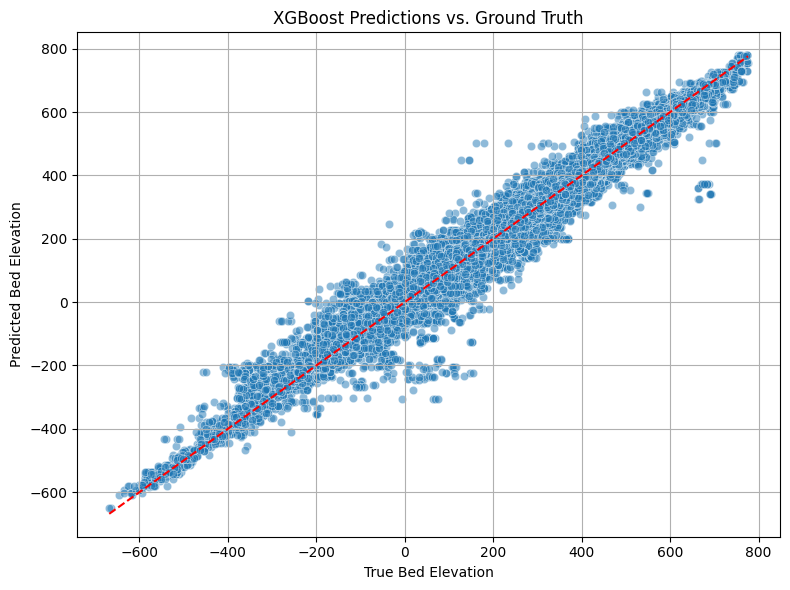

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of predictions vs true values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_raw, y=y_pred_raw_1, alpha=0.5)
plt.xlabel("True Bed Elevation")
plt.ylabel("Predicted Bed Elevation")
plt.title("XGBoost Predictions vs. Ground Truth")
plt.plot([y_test_raw.min(), y_test_raw.max()], [y_test_raw.min(), y_test_raw.max()], 'r--')
plt.grid(True)
plt.tight_layout()
plt.show()


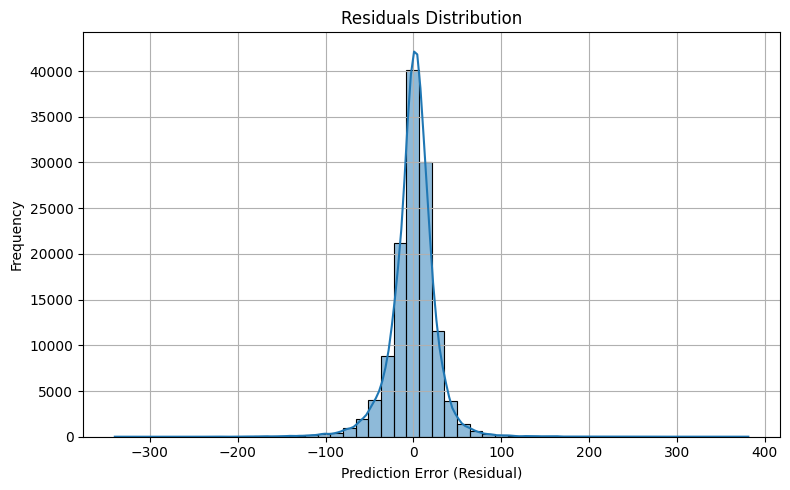

In [38]:
residuals_raw = y_test_raw - y_pred_raw_1

plt.figure(figsize=(8, 5))
sns.histplot(residuals_raw, bins=50, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error (Residual)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


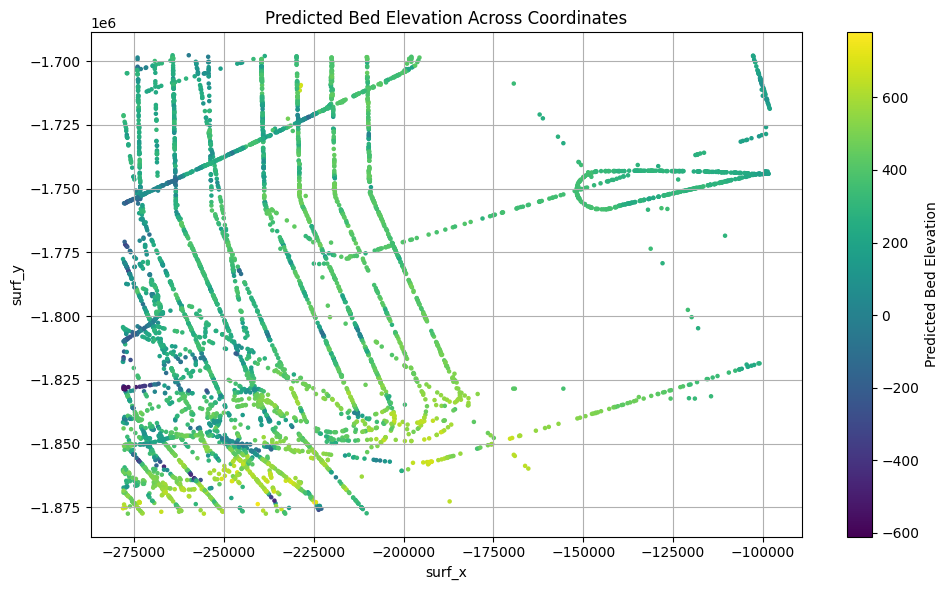

In [39]:
# Take a subsample for visual clarity
sample_df = df.sample(5000, random_state=42).copy()
X_sample = sample_df[features_raw]
X_sample_scaled = scaler_raw.transform(X_sample)
sample_df["prediction"] = model_raw.predict(X_sample_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    sample_df['surf_x'], sample_df['surf_y'],
    c=sample_df['prediction'], cmap='viridis', s=5
)
plt.colorbar(scatter, label="Predicted Bed Elevation")
plt.title("Predicted Bed Elevation Across Coordinates")
plt.xlabel("surf_x")
plt.ylabel("surf_y")
plt.grid(True)
plt.tight_layout()
plt.show()


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv('/content/data_full.csv', index_col=0)
df.dropna(inplace=True)

# Create a new feature: velocity magnitude
df['velocity_magnitude'] = np.sqrt(df['surf_vx']**2 + df['surf_vy']**2)

# Define features
features_raw = ['surf_x', 'surf_y', 'surf_elv', 'surf_dhdt', 'surf_SMB', 'velocity_magnitude']

target = 'track_bed_target'

X_raw = df[features_raw]
y = df[target]

# Scale the features
scaler_raw = StandardScaler()
X_raw_scaled = scaler_raw.fit_transform(X_raw)

# Train/test split
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_raw_scaled, y, test_size=0.2, random_state=42
)

# Train the model
model_raw = XGBRegressor(
    max_depth=7,
    n_estimators=350,
    learning_rate=0.25,
    subsample=0.8,
    min_child_weight=0.25,
    random_state=42,
    n_jobs=-1
)

model_raw.fit(X_train_raw, y_train_raw)

# Predict and evaluate
y_pred_raw_2 = model_raw.predict(X_test_raw)

rmse_raw = mean_squared_error(y_test_raw, y_pred_raw_2)
mae_raw = mean_absolute_error(y_test_raw, y_pred_raw_2)
r2_raw = r2_score(y_test_raw, y_pred_raw_2)

print(f"Without velocity_magnitude:")
print(f"RMSE: {rmse_raw:.3f}")
print(f"MAE: {mae_raw:.3f}")
print(f"R²: {r2_raw:.3f}")


Without velocity_magnitude:
RMSE: 756.792
MAE: 18.148
R²: 0.977


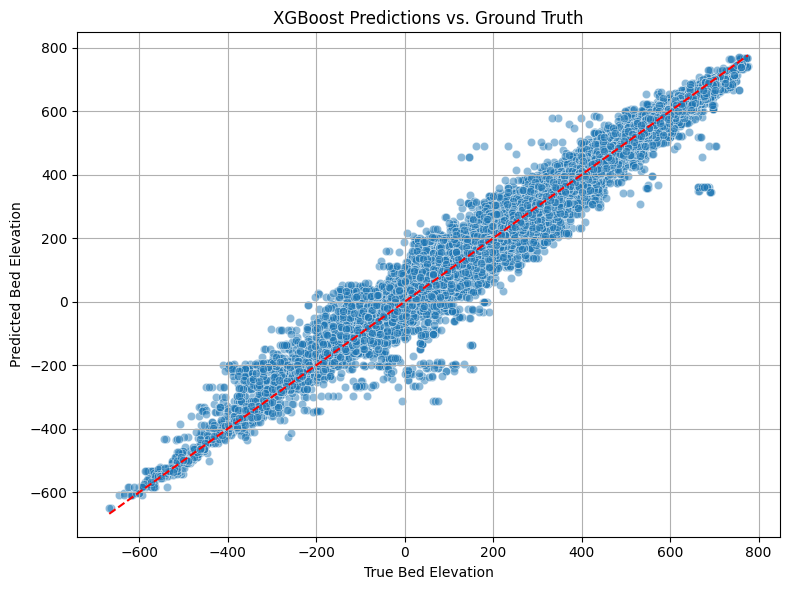

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of predictions vs true values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_raw, y=y_pred_raw_2, alpha=0.5)
plt.xlabel("True Bed Elevation")
plt.ylabel("Predicted Bed Elevation")
plt.title("XGBoost Predictions vs. Ground Truth")
plt.plot([y_test_raw.min(), y_test_raw.max()], [y_test_raw.min(), y_test_raw.max()], 'r--')
plt.grid(True)
plt.tight_layout()
plt.show()


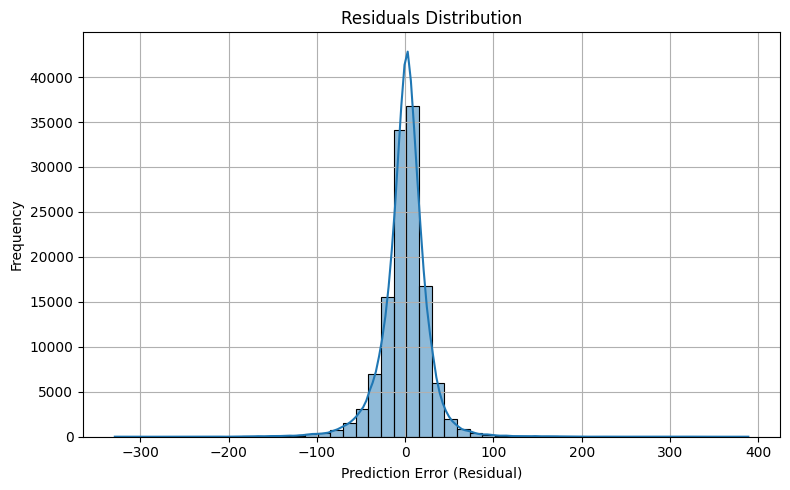

In [42]:
residuals_raw = y_test_raw - y_pred_raw_2

plt.figure(figsize=(8, 5))
sns.histplot(residuals_raw, bins=50, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error (Residual)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


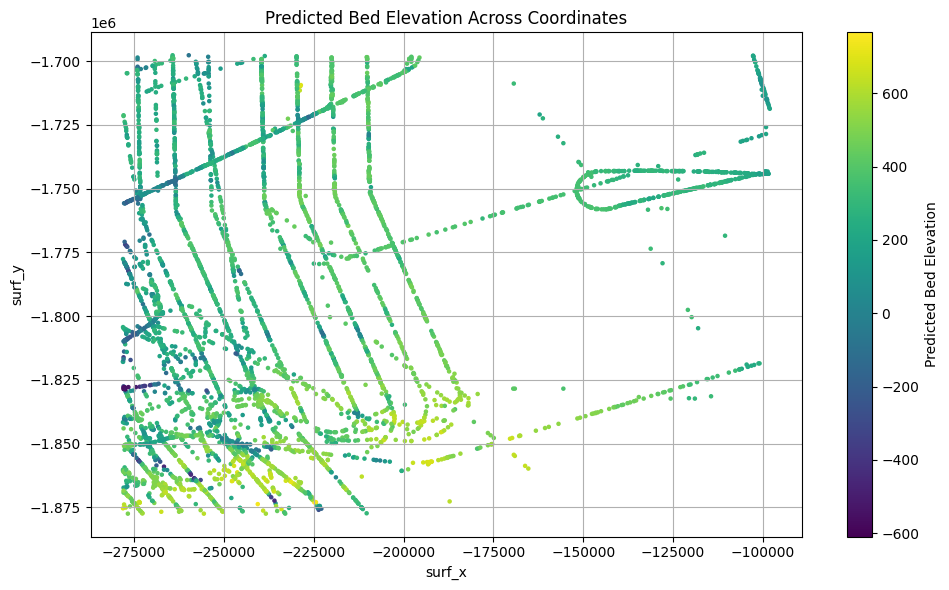

In [43]:
# Take a subsample for visual clarity
sample_df = df.sample(5000, random_state=42).copy()
X_sample = sample_df[features_raw]
X_sample_scaled = scaler_raw.transform(X_sample)
sample_df["prediction"] = model_raw.predict(X_sample_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    sample_df['surf_x'], sample_df['surf_y'],
    c=sample_df['prediction'], cmap='viridis', s=5
)
plt.colorbar(scatter, label="Predicted Bed Elevation")
plt.title("Predicted Bed Elevation Across Coordinates")
plt.xlabel("surf_x")
plt.ylabel("surf_y")
plt.grid(True)
plt.tight_layout()
plt.show()


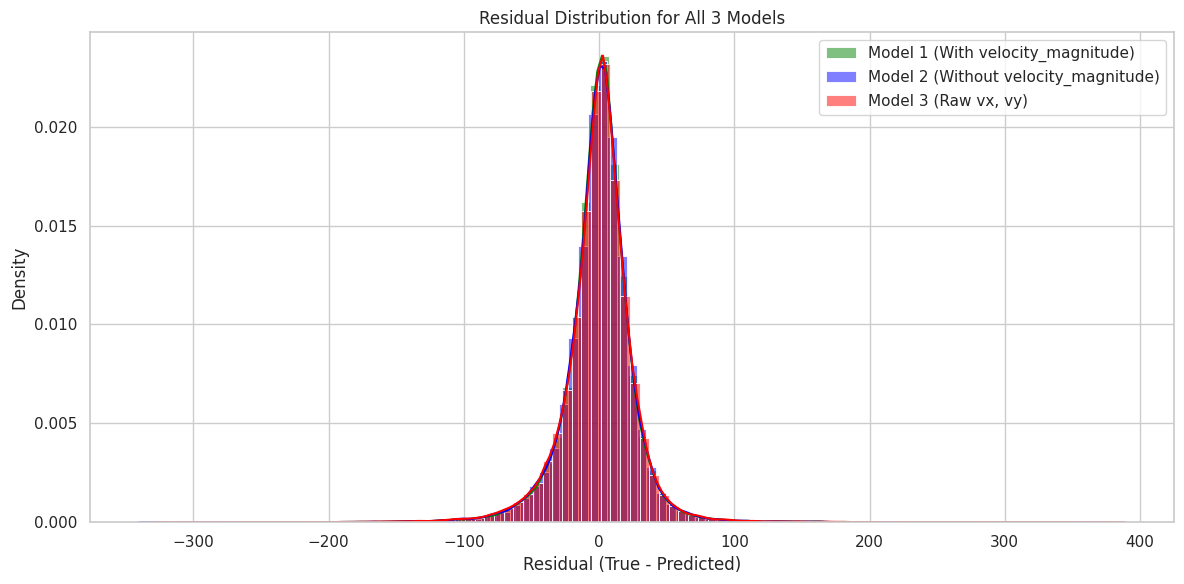

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals_model_1 = y_test - y_pred
residuals_model_2 = y_test_raw - y_pred_raw_1
residuals_model_3 = y_test_raw - y_pred_raw_2

# Plot all residual distributions
plt.figure(figsize=(12, 6))
sns.histplot(residuals_model_1, bins=100, kde=True, color='green', label='Model 1 (With velocity_magnitude)', stat="density")
sns.histplot(residuals_model_2, bins=100, kde=True, color='blue', label='Model 2 (Without velocity_magnitude)', stat="density")
sns.histplot(residuals_model_3, bins=100, kde=True, color='red', label='Model 3 (Raw vx, vy)', stat="density")

plt.title("Residual Distribution for All 3 Models")
plt.xlabel("Residual (True - Predicted)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


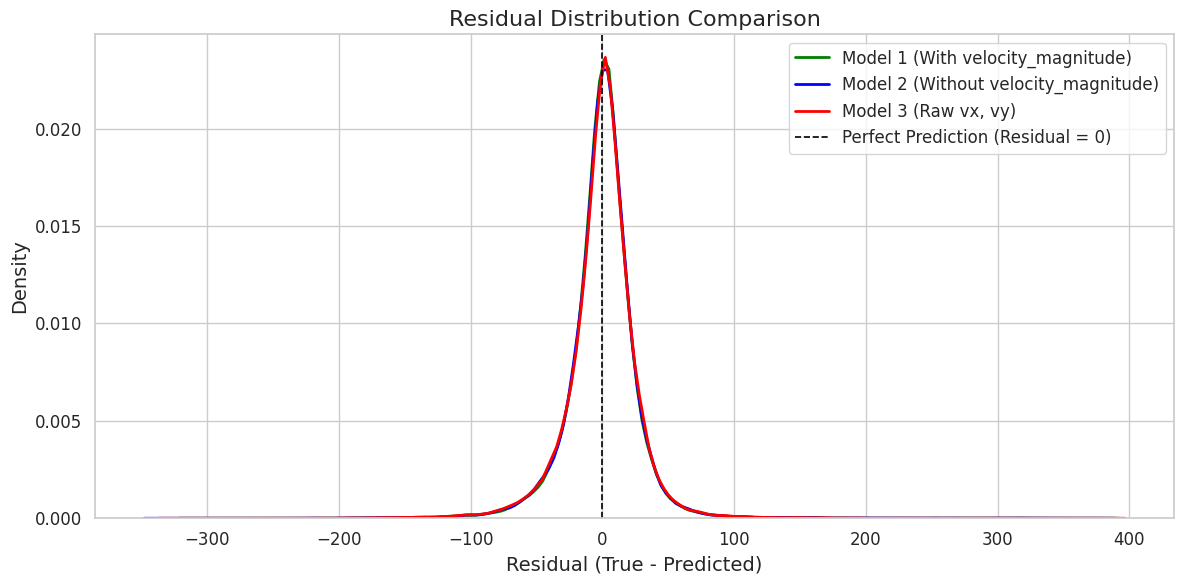

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Style settings
sns.set(style="whitegrid")

# Improved plot with better color contrast, line styles, and labels
sns.kdeplot(residuals_model_1, color='green', label='Model 1 (With velocity_magnitude)', linewidth=2)
sns.kdeplot(residuals_model_2, color='blue', label='Model 2 (Without velocity_magnitude)', linewidth=2)
sns.kdeplot(residuals_model_3, color='red', label='Model 3 (Raw vx, vy)', linewidth=2)

# Add a vertical line at 0 to represent perfect prediction
plt.axvline(0, color='black', linestyle='--', linewidth=1.2, label='Perfect Prediction (Residual = 0)')

# Titles and labels
plt.title("Residual Distribution Comparison", fontsize=16)
plt.xlabel("Residual (True - Predicted)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.grid(True)

plt.show()
